In [33]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Step :1 read date column as date time datatype

In [34]:
df=pd.read_csv('dailysales.csv',parse_dates=['date'])

C:\Users\umidu\AppData\Local\Temp\ipykernel_20652\3267637386.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv('dailysales.csv',parse_dates=['date'])


In [35]:
df.info() # date format 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    704 non-null    datetime64[ns]
 1   sales   704 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.1 KB


In [36]:
df.head() 

,date,sales
0,2018-01-01,477.0
1,2018-01-02,365.0
2,2018-01-03,442.0
3,2018-01-04,490.0
4,2018-01-05,396.0


# Step :2 No missing value

In [37]:
df.isnull().sum()

date     0
sales    0
dtype: int64

# Step-3 :Data Structure required for Time series

In [38]:
df=df.groupby('date').sum()

In [39]:
df.head(10)

,sales
date,
2018-01-01,477.0
2018-01-02,365.0
2018-01-03,442.0
2018-01-04,490.0
2018-01-05,396.0
2018-01-06,385.0
2018-01-07,492.0
2018-01-08,473.0
2018-01-09,249.0


In [40]:
#daily> monthyly 
# how to aggregate the date we take the sum or the mean?
df=df.resample(rule='MS').sum() # rule & aggregation parameter

In [41]:
df.head(10)

,sales
date,
2018-01-01,9035.0
2018-02-01,9571.0
2018-03-01,13143.0
2018-04-01,12427.0
2018-05-01,8133.0
2018-06-01,7437.0
2018-07-01,11758.0
2018-08-01,9992.0
2018-09-01,7216.0


<Axes: xlabel='date'>

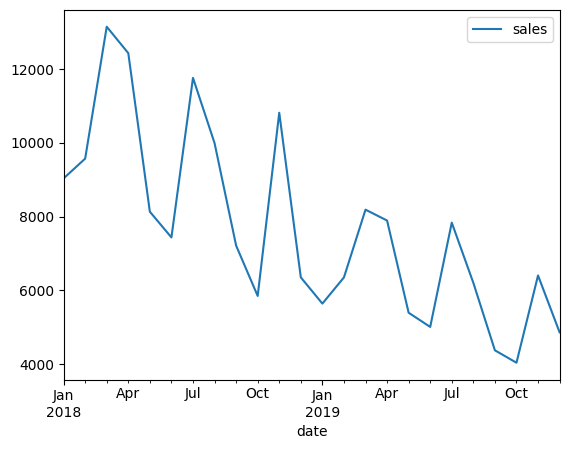

In [42]:
df.plot()

In [43]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

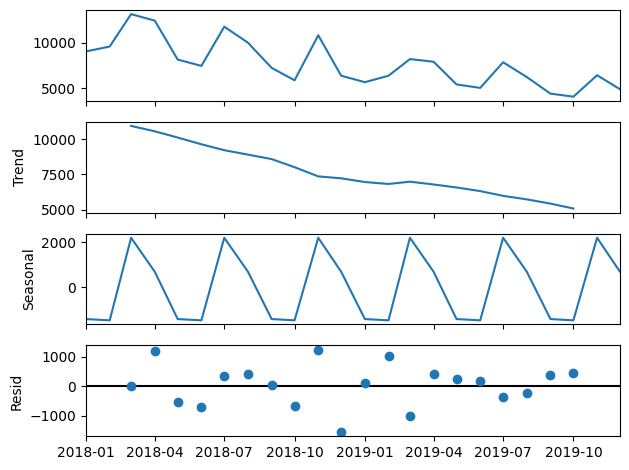

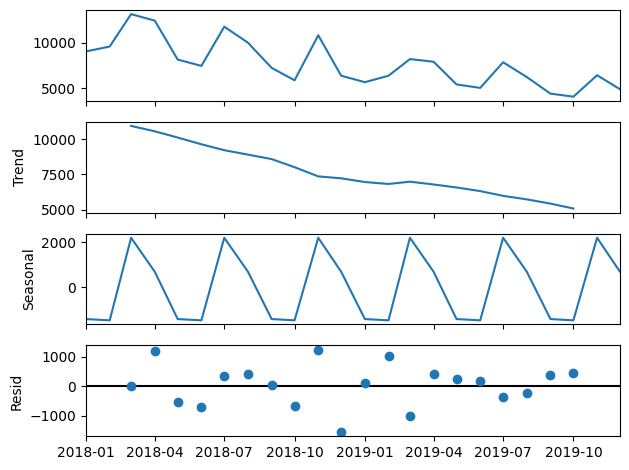

In [44]:
seasonal_decompose(df,model='additive',period=4).plot()

# Step 4: Train test Split

In [45]:
train=df[:19] #till Jul19
test=df[19:] # from aug19

In [46]:
train.tail()

,sales
date,
2019-03-01,8188.55
2019-04-01,7894.25
2019-05-01,5397.40
2019-06-01,5012.80
2019-07-01,7837.30


In [47]:
test

,sales
date,
2019-08-01,6207.00
2019-09-01,4379.25
2019-10-01,4043.45
2019-11-01,6406.95
2019-12-01,4867.25


# Step 5: Holt Winters Model

In [48]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [49]:
hwmodel=ExponentialSmoothing(train.sales,trend='add', seasonal='mul', seasonal_periods=4).fit()

In [50]:
test_pred=hwmodel.forecast(5)

In [51]:
test_pred

2019-08-01    6036.938739
2019-09-01    4129.455589
2019-10-01    3935.164628
2019-11-01    5994.406614
2019-12-01    4927.683214
Freq: MS, dtype: float64

<Axes: xlabel='date'>

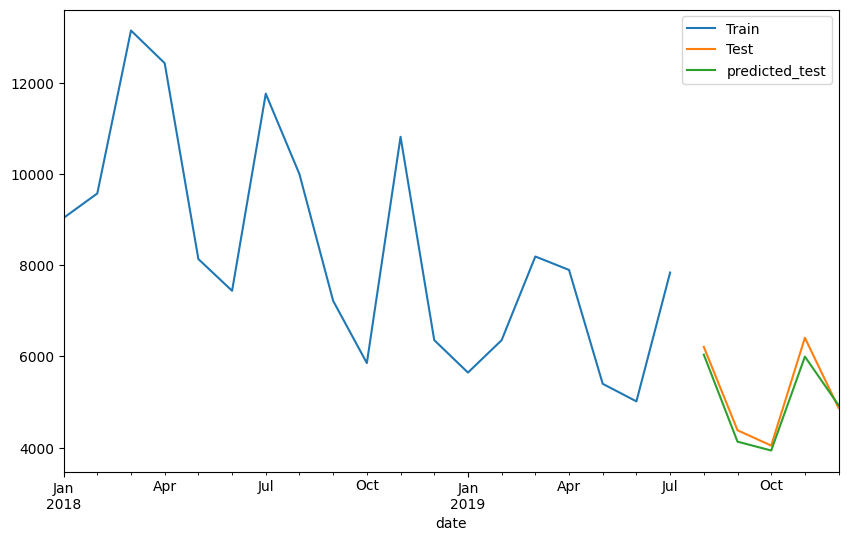

In [52]:
train['sales'].plot(legend=True, label='Train', figsize=(10,6))
test['sales'].plot(legend=True, label='Test')

test_pred.plot(legend=True, label='predicted_test')

# Step: 6. Model Evaluation

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
np.sqrt(mean_squared_error(test,test_pred))

235.32446559351715

In [55]:
df.sales.mean(), np.sqrt(df.sales.var())

(7665.204166666666, 2549.757117414906)

# Step: 7. Final Model

In [56]:
final_model=ExponentialSmoothing(df.sales,trend='add', seasonal='mul', seasonal_periods=4).fit()

In [57]:
pred=final_model.forecast(4)

In [58]:
pred

2020-01-01    3521.047144
2020-02-01    3318.765257
2020-03-01    4984.848634
2020-04-01    4044.415441
Freq: MS, dtype: float64

<Axes: xlabel='date'>

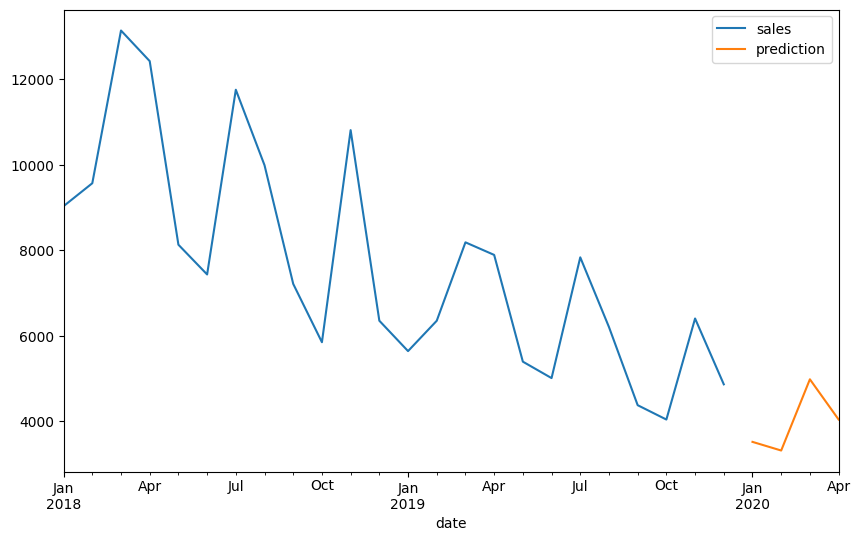

In [59]:
df['sales'].plot(legend=True, label='sales', figsize=(10,6))
pred.plot(legend=True, label='prediction')